<a href="https://colab.research.google.com/github/Philomathea/OPEN-WEATHER-DATA/blob/main/Citybikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install requests

In [57]:
import pandas as pd
import requests
import json
import datetime as dt

In [58]:
url = "http://api.citybik.es/v2/networks"

In [59]:
response = requests.get(url=url).json()
response

{'networks': [{'company': ['ЗАО «СитиБайк»'],
   'href': '/v2/networks/velobike-moscow',
   'id': 'velobike-moscow',
   'location': {'city': 'Moscow',
    'country': 'RU',
    'latitude': 55.75,
    'longitude': 37.616667},
   'name': 'Velobike'},
  {'company': ['Comunicare S.r.l.'],
   'href': '/v2/networks/bicincitta-siena',
   'id': 'bicincitta-siena',
   'location': {'city': 'Siena',
    'country': 'IT',
    'latitude': 43.3186,
    'longitude': 11.3306},
   'name': 'Bicincittà',
   'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=202'},
  {'company': ['Cyclopolis Systems'],
   'href': '/v2/networks/cyclopolis-maroussi',
   'id': 'cyclopolis-maroussi',
   'location': {'city': 'Maroussi',
    'country': 'GR',
    'latitude': 38.0568722388,
    'longitude': 23.8083299536},
   'name': 'Cyclopolis'},
  {'company': ['Cyclopolis Systems'],
   'href': '/v2/networks/cyclopolis-nafplio',
   'id': 'cyclopolis-nafplio',
   'location': {'city': 'Nafplio',
    'country': 'GR',
    'l

In [60]:
response['networks'][0]['location']['city']

'Moscow'

In [61]:
response['networks'][0]['company']

['ЗАО «СитиБайк»']

In [62]:
response['networks'][3]['name']

'Cyclopolis'

In [63]:
len(response['networks'])

770

In [64]:
network = response['networks']

In [65]:
data = pd.DataFrame()
for net in network:
  print(net['name'])


Velobike
Bicincittà
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Cyclopolis
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Bicincittà
Bicincittà
Bicincittà
TFI Bikes
TFI Bikes
Pun Pun Bike Share
TFI Bikes
Bicincittà
Bydgoski rower aglomeracyjny
Santander Cycles
WE-cycle
Bicincittà
StadtRAD Hamburg'
Tigullionbike
ARbike
Velobike
Vélib' Métropole
Ascoli Piceno
BiGi
Girocleta
Alba
BikeMi
Biella
Chivasso
Bizi
EcoBici
Bici in Busto
Velo Antwerpen
Cuneo
Malmö by bike
BiciMAD
EasyBike
FRee Bike sharing
EasyBike
EasyBike
lecce
EasyBike
EasyBike
Manerba in Bici
EasyBike
EasyBike
EasyBike
Mar e Bici
EasyBike
EasyBike
Novara
EasyBike
EasyBike
ThessBike
AthensBikes
GoodBike
Bicicoruña
BiciFerrolTerra
Mi Muovo in Bici
Bixi
Mi Muovo in Bici
Bike Share Toronto
SoBi
Pavia in bici
Bici Perugia
ATX MetroBike
Bike Chattanooga
Mi Muovo in Bici
Pinerolo
BIKETOWN
Mi Muovo in Bici
Boulder BCycle
Mi Muovo in Bici
Broward BCycle
Bublr Bikes
Reddy Bi

In [66]:
data = pd.DataFrame()
for i in range(len(response['networks'])):
  # temp represents temporary dataframe
  temp = pd.DataFrame(
      {
          'Name': [response['networks'][i]['name']],
          'City': [response['networks'][i]['location']['city']],
          'Country': [response['networks'][i]['location']['country']],
          'Latitude': [response['networks'][i]['location']['latitude']],
          'Longitude': [response['networks'][i]['location']['longitude']]
      }
  )
  data = pd.concat([data, temp], ignore_index = True)

In [67]:
data.head()

,Name,City,Country,Latitude,Longitude
0,Velobike,Moscow,RU,55.750000,37.616667
1,Bicincittà,Siena,IT,43.318600,11.330600
2,Cyclopolis,Maroussi,GR,38.056872,23.808330
3,Cyclopolis,Nafplio,GR,37.563940,22.809340
4,Bicincittà,Parco dei Colli di Bergamo,IT,45.722956,9.649230


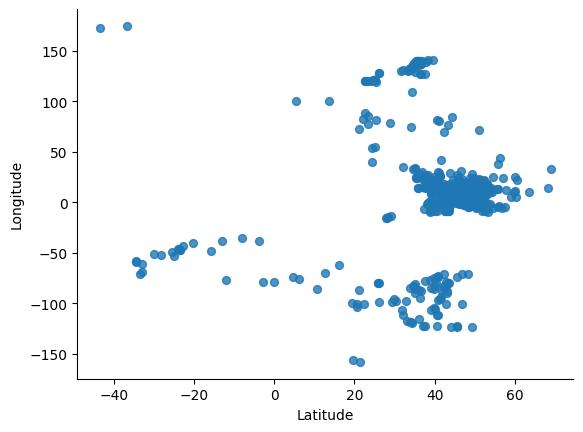

In [68]:
# visualizing with reference to longitude and latitude
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [69]:
data.query('Country == "US"') # To get the companies in US

,Name,City,Country,Latitude,Longitude
27,WE-cycle,"Aspen, CO",US,39.194951,-106.837002
77,ATX MetroBike,"Austin, TX",US,30.264080,-97.743550
78,Bike Chattanooga,"Chattanooga, TN",US,35.045630,-85.309680
81,BIKETOWN,"Portland, OR",US,45.521754,-122.681079
83,Boulder BCycle,"Boulder, CO",US,40.008110,-105.263850
85,Broward BCycle,"Fort Lauderdale, FL",US,26.120260,-80.148190
86,Bublr Bikes,"Milwaukee, WI",US,43.036900,-87.896670
87,Reddy Bike Share,"Buffalo, NY",US,42.893738,-78.871804
88,Capital BikeShare,"Washington, DC",US,38.896758,-77.037016
89,Charlotte Joyrides,"Charlotte, NC",US,35.227160,-80.838550


In [70]:
data.query('Country == "US"').shape # To know how many companies there are without counting

(59, 5)

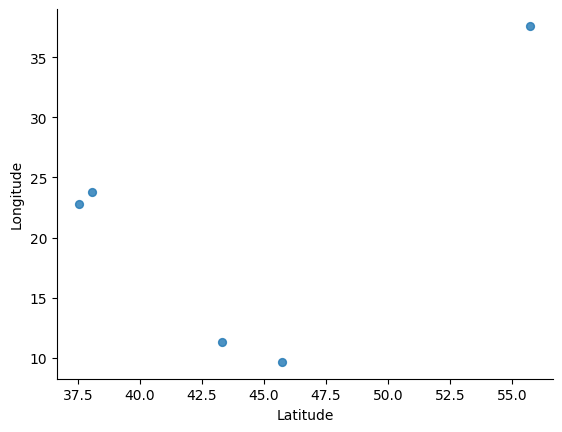

In [71]:
from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [72]:
city_url = "http://api.citybik.es/v2/networks/memphis"

In [73]:
clarksville = requests.get(url=city_url).json()
clarksville

{'network': {'company': ['BCycle, LLC'],
  'gbfs_href': 'https://gbfs.bcycle.com/bcycle_memphis/gbfs.json',
  'href': '/v2/networks/memphis',
  'id': 'memphis',
  'location': {'city': 'Memphis, TN',
   'country': 'US',
   'latitude': 35.1486,
   'longitude': -90.045},
  'name': 'Explore Bike Share',
  'stations': [{'empty_slots': 3,
    'extra': {'address': 'Riverside Drive',
     'ebikes': 7,
     'has_ebikes': True,
     'last_updated': 1712757924,
     'normal_bikes': 0,
     'rental_uris': {'android': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7599&platform=android',
      'ios': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7599&platform=iOS'},
     'renting': 1,
     'returning': 1,
     'uid': 'bcycle_memphis_7599'},
    'free_bikes': 7,
    'id': '150ae24394362f9cef74117fab6579ab',
    'latitude': 35.13334,
    'longitude': -90.06531,
    'name': 'Tom Lee Park - Picnic Area',
    'timestamp': '2024-04-

In [74]:
len(clarksville['network']['stations'])

36

In [75]:
clarksville['network']['stations']

[{'empty_slots': 3,
  'extra': {'address': 'Riverside Drive',
   'ebikes': 7,
   'has_ebikes': True,
   'last_updated': 1712757924,
   'normal_bikes': 0,
   'rental_uris': {'android': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7599&platform=android',
    'ios': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7599&platform=iOS'},
   'renting': 1,
   'returning': 1,
   'uid': 'bcycle_memphis_7599'},
  'free_bikes': 7,
  'id': '150ae24394362f9cef74117fab6579ab',
  'latitude': 35.13334,
  'longitude': -90.06531,
  'name': 'Tom Lee Park - Picnic Area',
  'timestamp': '2024-04-10T14:05:24.199000Z'},
 {'empty_slots': 3,
  'extra': {'address': 'Riverside Drive',
   'ebikes': 7,
   'has_ebikes': True,
   'last_updated': 1712757924,
   'normal_bikes': 0,
   'rental_uris': {'android': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7598&platform=android',
    'ios': 'https://www.bcycle.co

In [76]:
clarksville['network'].keys()

dict_keys(['company', 'gbfs_href', 'href', 'id', 'location', 'name', 'stations'])

In [79]:
clarksville['network']['stations']

[{'empty_slots': 3,
  'extra': {'address': 'Riverside Drive',
   'ebikes': 7,
   'has_ebikes': True,
   'last_updated': 1712757924,
   'normal_bikes': 0,
   'rental_uris': {'android': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7599&platform=android',
    'ios': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7599&platform=iOS'},
   'renting': 1,
   'returning': 1,
   'uid': 'bcycle_memphis_7599'},
  'free_bikes': 7,
  'id': '150ae24394362f9cef74117fab6579ab',
  'latitude': 35.13334,
  'longitude': -90.06531,
  'name': 'Tom Lee Park - Picnic Area',
  'timestamp': '2024-04-10T14:05:24.199000Z'},
 {'empty_slots': 3,
  'extra': {'address': 'Riverside Drive',
   'ebikes': 7,
   'has_ebikes': True,
   'last_updated': 1712757924,
   'normal_bikes': 0,
   'rental_uris': {'android': 'https://www.bcycle.com/applink?system_id=bcycle_memphis&station_id=bcycle_memphis_7598&platform=android',
    'ios': 'https://www.bcycle.co

In [84]:
clarksville = pd.DataFrame()
for n in network:
  print(net['name'])


OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
OV-fiets
O

In [96]:
clarksville = pd.DataFrame()
for i in range(len(clarksville)):
  # temp represents temporary dataframe
  temp = pd.DataFrame(
      {
          'Name': [response['networks'][i]['name']],
          'City': [response['networks'][i]['location']['city']],
          'Country': [response['networks'][i]['location']['country']],
          'Latitude': [response['networks'][i]['location']['latitude']],
          'Longitude': [response['networks'][i]['location']['longitude']]
      }
  )
  data = pd.concat([data, temp], ignore_index = True)

In [100]:
data.tail()

,Name,City,Country,Latitude,Longitude
765,Xi'an Public Bicycle,西安 (Xi'an),CN,34.268800,108.945800
766,LinkBike,Penang,MY,5.419200,100.328100
767,어울링 (Eoulling),세종 (Sejong),KR,36.490100,127.282900
768,누비자 (Nubija),창원시 (Changwon),KR,35.223691,128.670599
769,OV-fiets,Nederland,NL,52.144900,5.560300


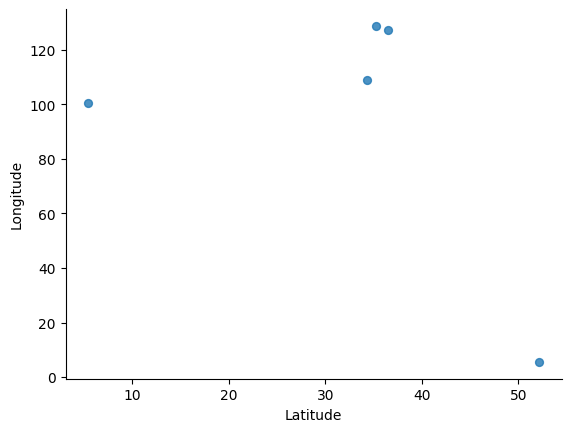

In [99]:
# To visualise the tail
from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)